In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, bisect

### all about the inequality for the rho solution (both when pi=0 (so Iacopini19) or pi != 0)

In [67]:
def l1_line_pi0(l2):
    return -l2 + 2*np.sqrt(l2), -l2 - 2*np.sqrt(l2)

def l2_line_pi0(l1):
    return 2 - l1 + 2*np.sqrt(1-l1), 2 - l1 - 2*np.sqrt(1-l1)

def ineq_function(l2, l1):
    return l2**2 + l2 * (2*l1 - 4) + l1**2

def rho_sol(l1, l2):
    term1 = 1/2 * (1 - l1/l2)
    term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)
    return term1 + term2, term1 - term2

def m_sol(rho, l2, pi):
    return np.sqrt(rho**2 - 4*pi/l2)

def LSA_mat(sol, l1, l2, pi):
    rho, m = sol
    r = 1
    a11 = l1*(1-rho) - l1*rho + (1-rho)*rho*l2 - 2*pi - l2/2*(rho**2 + m**2) - r
    a12 = (1-rho)*m*l2
    a21 = -l1*m + l2*(1-rho)*m - l2*rho*m
    a22 = (1-rho)*(l1 + l2*rho) - r
    return np.array([[a11, a12], [a21, a22]])


# less interesting solutions where m = 0
def rho_sol_m0_pi0(l1, l2):
    inSqrt = (l2/2 - l1)**2 + 2*l2*(l1 - 1)
    sqrtVal = np.sqrt(inSqrt)
    outSqrt = 1/2 - l1/l2
    return outSqrt + 1/l2*sqrtVal, outSqrt - 1/l2*sqrtVal

def valid_l2_rho_sol_m0_pi0(l1):
    return 4 + 2*np.sqrt(4 - l1**2)


def rho_sol_m0_pineq0(l1, l2, pi):
    r = 1
    a = -l2/2
    b = l2/2 - l1
    c = l1 - 2*pi - r
    d = 2*pi
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    roots, roots_Re = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        roots.append(f0_root), roots_Re.append(f0_root.real)
    return roots_Re, roots


In [44]:
# testing the solutions with m = 0
l1 = 1.6
l2_thresh = valid_l2_rho_sol_m0_pi0(l1)
print(l2_thresh)

6.3999999999999995


In [45]:
# when pi = 0
l2 = 2
sols = rho_sol_m0_pi0(l1, l2)
for sol in sols:
    print(f'rho = {sol}')
    lsa_mat = LSA_mat((sol, 0), l1, l2, 0.0)
    if sol >= 0.0:
        eigvals = np.linalg.eig(lsa_mat)[0]
        print(f'eigenvalues = {eigvals}')

rho = 0.5306623862918075
eigenvalues = [-0.88160257  0.24905982]
rho = -1.1306623862918075


In [46]:
# when pi > 0
l2 = 2
pi = 0.1
solsRe, sols = rho_sol_m0_pineq0(l1, l2, pi)

for sol in sols:
    if abs(sol.imag) < 1e-8:
        lsa_mat = LSA_mat((sol.real, 0), l1, l2, pi)
        eigvals = np.linalg.eig(lsa_mat)[0]
        print(sol.real)
        print(f'eigenvalues = {eigvals}')
    else:
        print(sol)


print('Just to compare, the solution with m != 0 which does not depend on pi (the rho val)')
rho_plus, rho_minus = rho_sol(l1, l2)
m_rho_plus = m_sol(rho_plus, l2, pi)
print(f'Sym breaking solution: rho, m_rho_plus = {rho_plus, m_rho_plus}')

0.6056592525820266
eigenvalues = [-1.42726049  0.10861744]
-0.7849967927802789
eigenvalues = [-0.50666374 -0.94643865]
-0.4206624598017479
eigenvalues = [0.37392424 0.07782121]
Just to compare, the solution with m != 0 which does not depend on pi (the rho val)
Sym breaking solution: rho, m_rho_plus = (0.6567764362830022, 0.4809940615606397)


In [ ]:
365*24*10

87600

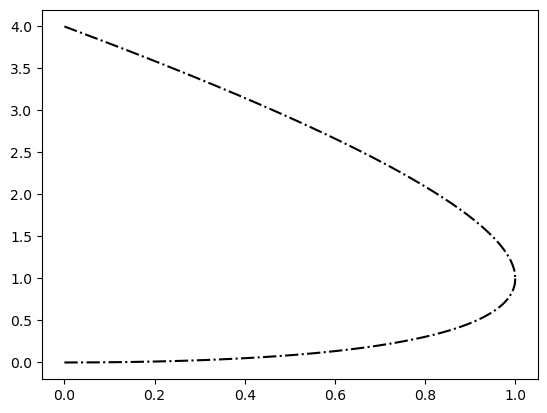

In [42]:
l1s = np.arange(0.0, 1.001, 0.001)
fig, ax = plt.subplots()
ax.plot(l1s, l2_line_pi0(l1s)[0], ls='-.', color='xkcd:black')
ax.plot(l1s, l2_line_pi0(l1s)[1], ls='-.', color='xkcd:black')

In [9]:
l1, l2 = 0.8, 0.01
l1, l2 = 1.0001, 0.5
print(ineq_function(l2, l1))
print(rho_sol(l1, l2))

0.2503000099999999
(0.00019992004796498541, -1.000399920047965)


### ... and now the inequality for the m solution, when pi != 0

In [142]:
def pi_thresh_m_neq_0_sol(l2, l1):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3, term1 + term2 - term3

# equation to send to the root finder
def eq_isoline(l2, l1, pi, sign):
    lambda_func = pi_thresh_m_neq_0_sol(l1, l2)
    return lambda_func[sign] - pi

# eq for doing the bisection with l1,pi as parameters for the rho plus solution
def eq_isoline_rho_plus(l2, l1, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3 - pi

# eq for doing the bisection with l2,pi as parameters for the rho plus solution
def eq_isoline_rho_plus_l2(l1, l2, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 + term3 - pi

# eq for doing the bisection with l1,pi as parameters for the rho minus solution and l2 as argument
def eq_isoline_rho_minus(l2, l1, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 - term3 - pi

# eq for doing the bisection with l2,pi as parameters for the rho minus solution and l1 as argument
# is this necessary???
def eq_isoline_rho_minus_l2(l1, l2, pi):
    term1 = l2*(1-l1/l2)**2 / 16
    term2 = ((l2 + l1)**2 - 4*l2)/(16*l2)
    term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
    return term1 + term2 - term3 - pi



# actual functions that integrate the bisection
def thresh_line_m_rho_plus(l1s, pi):
    b_bisec = 10.0
    sols = []
    for l1 in l1s:
        if l1 < 1:
            a_bisec = l2_line_pi0(l1)[0]
        else:
            a_bisec = 1e-7
        try:
            sol, r = bisect(eq_isoline_rho_plus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

def thresh_line_m_rho_plus_l2(l2s, pi):
    # now l2 is fixed and I search for the value of l1
    b_bisec = 20.0
    sols = []
    for l2 in l2s:
        if l2 >= 1:
            a_bisec = l1_line_pi0(l2)[0]
        else:
            a_bisec = 1.0
        try:
            sol, r = bisect(eq_isoline_rho_plus_l2, a_bisec, b_bisec, args=(l2, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

def thresh_line_m_rho_minus(l1s, pi):
    # for the moment i'm only interested in the lines in the region l1<1, so this function is pretty much the same as for rho_plus
    b_bisec = 10.0
    sols = []
    for l1 in l1s:
        if l1 < 1:
            a_bisec = l2_line_pi0(l1)[0]
        else:
            a_bisec = 1e-7
        try:
            sol, r = bisect(eq_isoline_rho_minus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

# not working, not necessary???
def thresh_line_m_rho_minus_l2(l2s, pi):
    b_bisec = 20.0
    sols = []
    for l2 in l2s:
        a_bisec = l1_line_pi0(l2)[1]
        try:
            sol, r = bisect(eq_isoline_rho_minus, a_bisec, b_bisec, args=(l2, pi), full_output=True)
        except ValueError:
            sol = float('nan')
        except RuntimeError:
            sol = float('nan')
        sols.append(sol)
    return sols

### threshold line for the rho_plus, m solution

In [92]:
l1s = np.arange(0.0, 2.05, 0.05)
pi = 0.1

sols = thresh_line_m_rho_plus(l1s, pi)

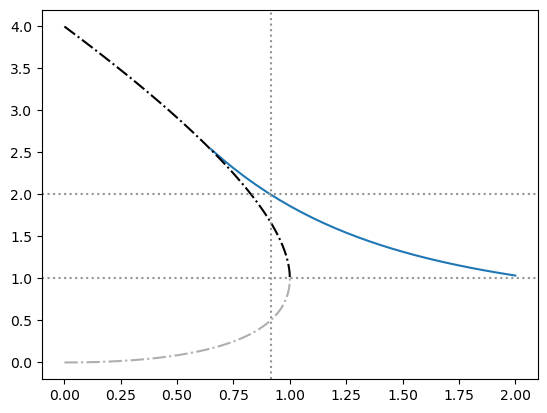

In [95]:
fig, ax = plt.subplots()
ax.plot(l1s, sols)

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
ax.axhline(2.0, 0, 1, ls=':', color='xkcd:gray')
ax.axvline(0.915, 0, 1, ls=':', color='xkcd:gray')

# the point 

In [42]:
pi = 0.1
l1, l2 = 0.25, 3.8
# l1, l2 = 0.99, 1.6
l1, l2 = 1.25, 1.1
rho = rho_sol(l1, l2)[1]
print(rho, m_sol(rho, l2, pi))

-0.5497640931912975 nan


/tmp/ipykernel_32640/3626171910.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(rho**2 - 4*pi/l2)


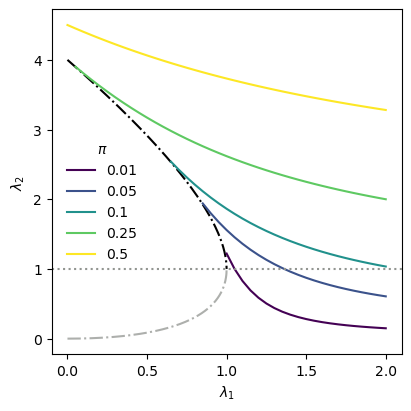

In [89]:
### let's do many pi for the rho_plus solution:

l1s = np.arange(0.0, 2.05, 0.05)
pis = [0.01, 0.05, 0.1, 0.25, 0.5]
pi_colors = plt.cm.viridis(np.linspace(0,1,len(pis)))

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)

for pi,pi_c in zip(pis,pi_colors):
    sols = thresh_line_m_rho_plus(l1s, pi)
    ax.plot(l1s, sols, label=pi, color=pi_c)

fig.legend(title=r'$\pi$', frameon=False, ncol=1, loc=(0.15,0.35))
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
fig.savefig(f'sol_rho_plus_m_thresh_lines_many_pi_space_l1_l2.png')

### and for the rho minus solution:

In [71]:
l1s = np.arange(0.0, 2.05, 0.05)
pi, sign = 0.1, 0

sols = []
b_bisec = 10.0

for l1 in l1s:
    if l1 < 1:
        a_bisec = l2_line_pi0(l1)[0]
    else:
        a_bisec = 1e-7
    try:
        sol, r = bisect(eq_isoline_rho_minus, a_bisec+1e-7, b_bisec, args=(l1, pi), full_output=True)
    except ValueError:
        sol = float('nan')
    except RuntimeError:
        sol = float('nan')
    sols.append(sol)

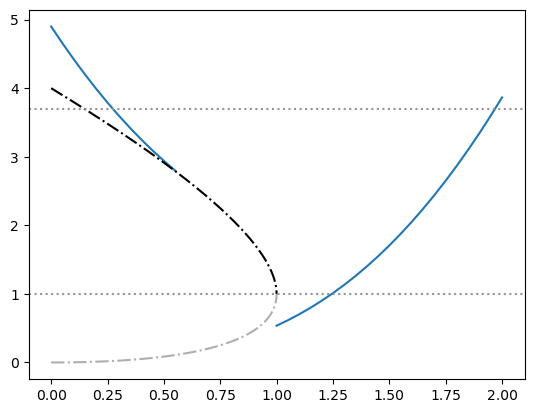

In [72]:
fig, ax = plt.subplots()
ax.plot(l1s, sols)

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
ax.axhline(3.7, 0, 1, ls=':', color='xkcd:gray')

In [91]:
pi = 0.1
l1, l2 = 0.25, 3.7
# l1, l2 = 1.25, 2.0
rho = rho_sol(l1, l2)[1]
print(rho, m_sol(rho, l2, pi))

0.3451589671137235 0.10500764005968495


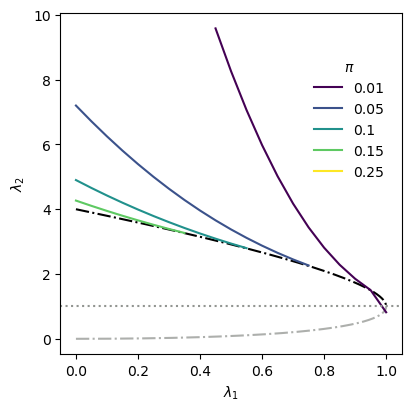

In [96]:
### let's do many pi for the rho_plus solution:

l1s = np.arange(0.0, 1.05, 0.05)
pis = [0.01, 0.05, 0.1, 0.15, 0.25]
pi_colors = plt.cm.viridis(np.linspace(0,1,len(pis)))

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black')
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.75)

for pi,pi_c in zip(pis,pi_colors):
    sols = thresh_line_m_rho_minus(l1s, pi)
    ax.plot(l1s, sols, label=pi, color=pi_c)

fig.legend(title=r'$\pi$', frameon=False, ncol=1, loc=(0.75,0.55))
ax.axhline(1.0, 0, 1, ls=':', color='xkcd:gray')
fig.savefig(f'sol_rho_minus_m_thresh_lines_many_pi_space_l1_l2.png')

In [113]:
l1, l2, pi = 0.2, 5, 0.05
rhop, rhom = rho_sol(l1, l2)
mp = m_sol(rhop, l2, pi)
mm = m_sol(rhom, l2, pi)

print(f'solution with plus: ({rhop}, {mp})')
lsa_mat = LSA_mat((rhop, mp), l1, l2, pi)
eigvals = np.linalg.eig(lsa_mat)[0]
print(eigvals)

print(f'solution with minus: ({rhom}, {mm})')
lsa_mat = LSA_mat((rhom, mm), l1, l2, pi)
eigvals = np.linalg.eig(lsa_mat)[0]
print(eigvals)


solution with plus: (0.745329983228432, 0.717994974842648)
[-2.0954685  -0.83118141]
solution with minus: (0.21467001677156794, 0.07799497484264778)
[-0.42313366  0.14978357]


#### is the rho minus solution ever positive somewhere?

In [181]:
l1s = np.linspace(0.001, 2, 1000)
l2s = np.linspace(0.001, 10, 1000)
l1grid, l2grid = np.meshgrid(l1s,l2s)
rho_min_grid = rho_sol(l1s[:,None], l2s[None,:])[1]

# the solutions with m0
# rho_grid = rho_sol_m0_pi0(l1s[:,None], l2s[None,:])[1]


/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:12: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)


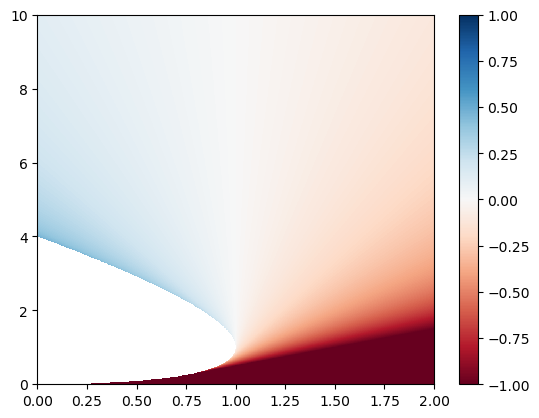

In [182]:
fig, ax = plt.subplots()
im = ax.pcolormesh(l1grid, l2grid, rho_min_grid.T, cmap='RdBu', vmin=-1, vmax=1, shading='nearest')
# im = ax.pcolormesh(l1grid, l2grid, rho_grid.T, cmap='RdBu', vmin=-1, vmax=1, shading='nearest')
fig.colorbar(im, ax=ax)

# Bifurcation diagram that includes all the solutions

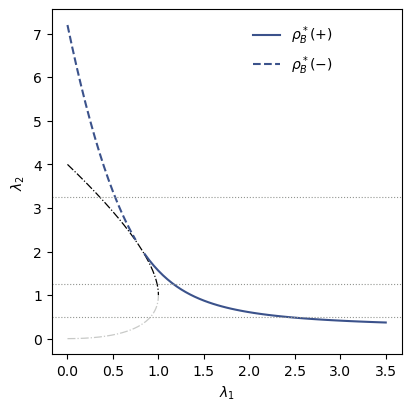

In [171]:
### all the threshold lines for the pi value that I'm going to use for the biffurcation diagrams:

l1s = np.arange(0.0,3.55, 0.05)
pi = 0.05

# to get the same color I used for pi=0.1 above
color = plt.cm.viridis(np.linspace(0,1,5))[1]

fig, ax = plt.subplots(1, 1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')

l1s_rho_line = np.arange(0.0, 1.001, 0.001)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[0], ls='-.', color='xkcd:black', lw=0.9)
ax.plot(l1s_rho_line, l2_line_pi0(l1s_rho_line)[1], ls='-.', color='xkcd:gray', alpha=0.5, lw=0.9)

# threshold line for the rho plus solution:
sols = thresh_line_m_rho_plus(l1s, pi)
ax.plot(l1s, sols, label=r'$\rho_B^*(+)$', color=color, ls='-')

# threshold line for the rho minus solution:
sols = thresh_line_m_rho_minus(l1s[l1s <= 1.0], pi)
ax.plot(l1s[l1s <= 1.0], sols, label=r'$\rho_B^*(-)$', color=color, ls='--')

fig.legend(frameon=False, ncol=1, loc=(0.6,0.8))

# selected l2s where we're going to plot bifurcation diagrams:
sel_l2s = {0.1: [0.75, 2.0, 3.9], 0.05:[0.5, 1.25, 3.25]}
for l2 in sel_l2s[pi]:
    ax.axhline(l2, 0, 1, ls=':', color='xkcd:gray', lw=0.8)

fig.savefig(f'thresh_lines_pi_{pi}_space_l1_l2.png')

## when l2 is high enough to have a region with the rho minus solution

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:12: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(rho**2 - 4*pi/l2)


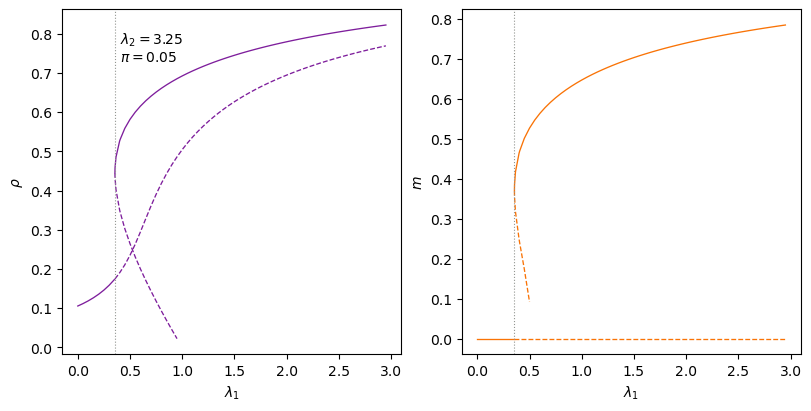

In [177]:
l1s = np.arange(0.0, 3.0, 0.05)

# l2, pi = 3.9, 0.1
l2, pi = 3.25, 0.05

fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda_1$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda_1$', ylabel=r'$m$')

# so the plot for the m transition looks nice...
l1_mneq0_sol = l1_line_pi0(l2)[0]
l1s = np.concatenate((l1s, np.array([l1_mneq0_sol, l1_mneq0_sol+1e-6, l1_mneq0_sol+1e-5, l1_mneq0_sol+1e-4, l1_mneq0_sol+1e-3, l1_mneq0_sol+1e-2, l1_mneq0_sol+5e-2])))
l1s = np.sort(l1s)

# solutions from the polynomial (m = 0)
rho_m0 = []
for l1 in l1s:
    solsRe, sols = rho_sol_m0_pineq0(l1, l2, pi)
    for sol in sols:
        counterValidSols = 0
        if abs(sol.imag) < 1e-8 and sol.real >= 0.0:
            counterValidSols += 1
            rho_m0.append(sol.real)
            # ax.scatter(l1, sol.real)
        if counterValidSols > 1:
            print(f'There are more than 1 valid sols for the polynomial when l1 = {l1}')
rho_m0 = np.array(rho_m0)

lw=0.95
# lower part: stable
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_m0[l1s < l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s < l1_mneq0_sol], np.zeros(len(rho_m0))[l1s < l1_mneq0_sol], ls='-', color='xkcd:orange', lw=lw)
# upper part: saddle
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_m0[l1s >= l1_mneq0_sol], ls='--', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s >= l1_mneq0_sol], np.zeros(len(rho_m0))[l1s >= l1_mneq0_sol], ls='--', color='xkcd:orange', lw=lw)

##### symmetry breaking solution #####
rho_plus, rho_minus = [], []
m_rho_plus, m_rho_minus = [], []
for l1 in l1s:
    rhop, rhom = rho_sol(l1, l2)
    mp, mm = m_sol(rhop, l2, pi), m_sol(rhom, l2, pi)
    rho_plus.append(rhop), m_rho_plus.append(mp)
    rho_minus.append(rhom), m_rho_minus.append(mm)
rho_plus = np.array(rho_plus)
rho_minus = np.array(rho_minus)

# rho plus values before m turns real:
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_plus[l1s < l1_mneq0_sol], ls='-', alpha=0.25, color='xkcd:purple', lw=lw) # nothing should be in here, m turns real a the same time as rho does...
# rho plus values after m turns real:
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_plus[l1s >= l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s, m_rho_plus, ls='-', color='xkcd:orange', lw=lw)

# rho minus values in their little corner: only when l1<1.0
# (i could compute the exact point where the solutions disapperar but whatever) ... this would also be great to make the m line touch 0
ax[0].plot(l1s[l1s < 1.0], rho_minus[l1s < 1.0], ls='--', color='xkcd:purple', lw=lw)
m_rho_minus = np.array(m_rho_minus)
ax[1].plot(l1s[l1s < 1.0], m_rho_minus[l1s < 1.0], ls='--', color='xkcd:orange', lw=lw)


ax[0].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[1].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[0].text(0.17, 0.9, rf'$\lambda_2 = {l2}$', transform = ax[0].transAxes)
ax[0].text(0.17, 0.85, rf'$\pi = {pi}$', transform = ax[0].transAxes)

fig.savefig(f'bifurcation_diagram_varl1_l2_{l2}_pi_{pi}.png')

## when l2 > 1:

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:12: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(rho**2 - 4*pi/l2)


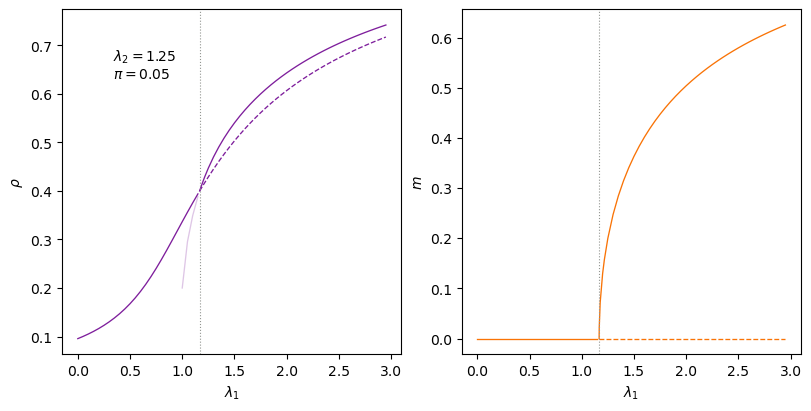

In [179]:
l1s = np.arange(0.0, 3.0, 0.05)
# l2, pi = 2.0, 0.1
l2, pi = 1.25, 0.05
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda_1$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda_1$', ylabel=r'$m$')

# so the plot for the m transition looks nice...
l1_mneq0_sol = thresh_line_m_rho_plus_l2([l2, ], pi)[0]
l1s = np.concatenate((l1s, np.array([l1_mneq0_sol, l1_mneq0_sol+1e-6, l1_mneq0_sol+1e-5, l1_mneq0_sol+1e-4, l1_mneq0_sol+1e-3, l1_mneq0_sol+1e-2, l1_mneq0_sol+5e-2])))
l1s = np.sort(l1s)

# solutions from the polynomial (m = 0)
rho_m0 = []
for l1 in l1s:
    solsRe, sols = rho_sol_m0_pineq0(l1, l2, pi)
    for sol in sols:
        counterValidSols = 0
        if abs(sol.imag) < 1e-8 and sol.real >= 0.0:
            counterValidSols += 1
            rho_m0.append(sol.real)
            # ax.scatter(l1, sol.real)
        if counterValidSols > 1:
            print(f'There are more than 1 valid sols for the polynomial when l1 = {l1}')
rho_m0 = np.array(rho_m0)

lw=0.95
# lower part: stable
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_m0[l1s < l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s < l1_mneq0_sol], np.zeros(len(rho_m0))[l1s < l1_mneq0_sol], ls='-', color='xkcd:orange', lw=lw)
# upper part: saddle
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_m0[l1s >= l1_mneq0_sol], ls='--', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s >= l1_mneq0_sol], np.zeros(len(rho_m0))[l1s >= l1_mneq0_sol], ls='--', color='xkcd:orange', lw=lw)

##### symmetry breaking solution #####
rho_plus, rho_minus = [], []
m_rho_plus, m_rho_minus = [], []
for l1 in l1s:
    rhop, rhom = rho_sol(l1, l2)
    mp, mm = m_sol(rhop, l2, pi), m_sol(rhom, l2, pi)
    rho_plus.append(rhop), m_rho_plus.append(mp)
    rho_minus.append(rhom), m_rho_minus.append(mm)
rho_plus = np.array(rho_plus)

# rho values before m turns real:
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_plus[l1s < l1_mneq0_sol], ls='-', alpha=0.25, color='xkcd:purple', lw=lw)
# rho values after m turns real:
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_plus[l1s >= l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s, m_rho_plus, ls='-', color='xkcd:orange', lw=lw)


ax[0].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[1].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[0].text(0.15, 0.85, rf'$\lambda_2 = {l2}$', transform = ax[0].transAxes)
ax[0].text(0.15, 0.8, rf'$\pi = {pi}$', transform = ax[0].transAxes)

fig.savefig(f'bifurcation_diagram_varl1_l2_{l2}_pi_{pi}.png')

## when l2 < 1

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:12: RuntimeWarning: invalid value encountered in sqrt
  term2 = 1/(2*l2) * np.sqrt((l1 + l2)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1310/2630088768.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(rho**2 - 4*pi/l2)


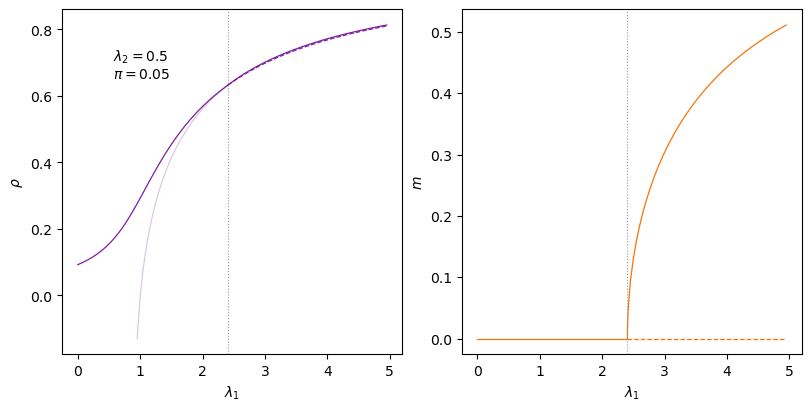

In [180]:
l1s = np.arange(0.0, 5.0, 0.05)
# l2, pi = 0.75, 0.1
l2, pi = 0.5, 0.05
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
ax[0].set(xlabel=r'$\lambda_1$', ylabel=r'$\rho$')
ax[1].set(xlabel=r'$\lambda_1$', ylabel=r'$m$')

# so the plot for the m transition looks nice...
l1_mneq0_sol = thresh_line_m_rho_plus_l2([l2, ], pi)[0]
l1s = np.concatenate((l1s, np.array([l1_mneq0_sol, l1_mneq0_sol+1e-6, l1_mneq0_sol+1e-5, l1_mneq0_sol+1e-4, l1_mneq0_sol+1e-3, l1_mneq0_sol+1e-2, l1_mneq0_sol+5e-2])))
l1s = np.sort(l1s)

# solutions from the polynomial (m = 0)
rho_m0 = []
for l1 in l1s:
    solsRe, sols = rho_sol_m0_pineq0(l1, l2, pi)
    for sol in sols:
        counterValidSols = 0
        if abs(sol.imag) < 1e-8 and sol.real >= 0.0:
            counterValidSols += 1
            rho_m0.append(sol.real)
            # ax.scatter(l1, sol.real)
        if counterValidSols > 1:
            print(f'There are more than 1 valid sols for the polynomial when l1 = {l1}')
rho_m0 = np.array(rho_m0)

lw = 0.9
# lower part: stable
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_m0[l1s < l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s < l1_mneq0_sol], np.zeros(len(rho_m0))[l1s < l1_mneq0_sol], ls='-', color='xkcd:orange', lw=lw)
# upper part: saddle
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_m0[l1s >= l1_mneq0_sol], ls='--', color='xkcd:purple', lw=lw)
ax[1].plot(l1s[l1s >= l1_mneq0_sol], np.zeros(len(rho_m0))[l1s >= l1_mneq0_sol], ls='--', color='xkcd:orange', lw=lw)

##### symmetry breaking solution #####
rho_plus, rho_minus = [], []
m_rho_plus, m_rho_minus = [], []
for l1 in l1s:
    rhop, rhom = rho_sol(l1, l2)
    mp, mm = m_sol(rhop, l2, pi), m_sol(rhom, l2, pi)
    rho_plus.append(rhop), m_rho_plus.append(mp)
    rho_minus.append(rhom), m_rho_minus.append(mm)
rho_plus = np.array(rho_plus)

# rho values before m turns real:
ax[0].plot(l1s[l1s < l1_mneq0_sol], rho_plus[l1s < l1_mneq0_sol], ls='-', alpha=0.25, color='xkcd:purple', lw=lw)
# rho values after m turns real:
ax[0].plot(l1s[l1s >= l1_mneq0_sol], rho_plus[l1s >= l1_mneq0_sol], ls='-', color='xkcd:purple', lw=lw)
ax[1].plot(l1s, m_rho_plus, ls='-', color='xkcd:orange', lw=lw)


ax[0].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[1].axvline(l1_mneq0_sol, 0, 1, ls=':', color='xkcd:gray', lw=0.8)
ax[0].text(0.15, 0.85, rf'$\lambda_2 = {l2}$', transform = ax[0].transAxes)
ax[0].text(0.15, 0.8, rf'$\pi = {pi}$', transform = ax[0].transAxes)

fig.savefig(f'bifurcation_diagram_varl1_l2_{l2}_pi_{pi}.png')

In [173]:
# l1 = l1_mneq0_sol + 1e-5
l1, l2, pi = 0.51, 3.25, 0.05

solsRe, sols = rho_sol_m0_pineq0(l1, l2, pi)
print(sols)
for sol in sols:
    if abs(sol.imag) < 1e-8 and sol.real >= 0.0:
        real_sol = sol.real
print(f'Stability of the solution with m=0: ({real_sol}, 0)')
lsa_mat = LSA_mat((real_sol, 0), l1, l2, pi)
eigvals = np.linalg.eig(lsa_mat)[0]
print(eigvals)

rhop, rhom = rho_sol(l1, l2)
mp = m_sol(rhop, l2, pi)
print(f'Stability of the solution with m != 0: ({rhop}, {mp})')
lsa_mat = LSA_mat((rhop, mp), l1, l2, pi)
eigvals = np.linalg.eig(lsa_mat)[0]
print(eigvals)

mm = m_sol(rhom, l2, pi)
print(f'Stability of the solution rho_minus with m != 0: ({rhom}, {mm})')
lsa_mat = LSA_mat((rhom, mm), l1, l2, pi)
eigvals = np.linalg.eig(lsa_mat)[0]
print(eigvals)

[(0.2404767202756988+0j), (0.2228385629390737+0.45414196504077325j), (0.2228385629390737-0.45414196504077325j)]
Stability of the solution with m=0: (0.2404767202756988, 0)
[-0.33565355 -0.01903821]
Stability of the solution with m != 0: (0.5856282046273646, 0.5304921606551872)
[-1.01506185 -0.39822982]
Stability of the solution rho_minus with m != 0: (0.2574487184495584, 0.06885768724593108)
[-0.3789165   0.03220816]


### using the contour function:

In [19]:
def plotter(f, c):
    x = np.linspace(0.001, 2, 1000)
    y = np.linspace(0.001, 10, 1000)
    X, Y = np.meshgrid(x,y)
    Z1, Z2 = pi_thresh_m_neq_0_sol(X,Y)
    fig, ax = plt.subplots(1,1,figsize=(4,4), constrained_layout=True)
    ax.set(xlabel=r'$\lambda_1$', ylabel=r'$\lambda_2$')
    cs = ax.contour(X,Y,Z1, levels=[c], colors='xkcd:red')
    cs = ax.contour(X,Y,Z2, levels=[c], colors='xkcd:blue')
    ax.plot(x, l2_line_pi0(x), color='xkcd:black', ls='-.')
    fig.savefig(f'pi_thresh_contour_lines_space_l1_l2_pi_{c}.png')

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:4: RuntimeWarning: invalid value encountered in sqrt
  term3 = (1-l1/l2)/8 * np.sqrt((l2 + l1)**2 - 4*l2)
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_53690/3912859795.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 2-l1+2*np.sqrt(1-l1)


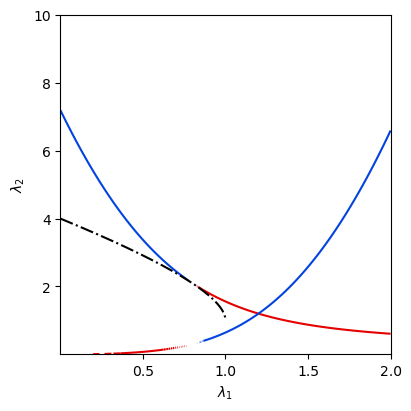

In [20]:
pi = 0.05
plotter(pi_thresh_m_neq_0_sol, pi)